#Marketing Analytics & Statistical Analysis

##Data Analysis - BUHI Supply Co.

###Perform Data Analysis on dataset "Optimize for Profit.csv"

####Dataset: Provided by [Stukent](https://www.stukent.com/) | Digital Marketing Analytics Simternship - California State Univeristy, East Bay


###Objectives
The goal is to optimize campaign performance and maximize profit margins across all campaigns, utilizing a total budget of $20,000.
Funds will be allocated strategically based on cost per click (CPC) and other campaign constraints. We will also analyze the following:

* Understand campaign performance by analyzing historical data, uncover trends across key metrics like clicks, impressions, CPC, and cost.

* Identify top-performing campaigns in terms of both efficiency (low CPC) and effectiveness (high clicks).

* Use CPC metrics to predict outcomes from allocated budgets.

* Prioritize campaigns that offer the most cost-effective clicks.

##Libraries, Directory, Data

Our data consists of one .csv file containing the following features:

* Campaign
* Campaign Type
* Source (Paid, Owned, Earned Media)
* Clicks
* Impressions
* Cost
* Click-Through-Rate (CTR)
* Input Budget
* Recommended Budget Max

In [1]:
#Change the Directory
%cd /content/drive/MyDrive/Assignments/Stukent - Data Analysis | Seminar in Digital Mktg/Profit

/content/drive/MyDrive/Assignments/Stukent - Data Analysis | Seminar in Digital Mktg/Profit


In [2]:
#Install needed libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Load the data
profits_df = pd.read_csv('Optimize_For_Profits.csv')
profits_df.head()

,Campaign Type,Source,Campaign,Input Budget,Cost per Impression,Impressions,CTR,Clicks,CPC,Marketing Cost,Recommended Budget Max,Conversions,CPA (Cost Per Conversion),Conversion Rate,Average Revenue Per Conversion,Revenue,Margin,Profits before Marketing Costs
0,Affiliate,Clickbank,Tote,112,0.04,2811,0.01,24,4.40,104,2657.0,2,52.00,0.07,94,188,0.82,154.16
1,Affiliate,Clickbank,Satchel,108,0.04,2513,0.01,28,3.55,98,1489.0,1,98.00,0.05,131,131,0.47,61.57
2,Affiliate,Clickbank,Purse,126,0.04,3486,0.01,32,3.85,122,1646.0,2,61.00,0.07,105,210,0.37,77.70
3,Affiliate,Shareasale,Purse,151,0.03,5560,0.01,37,3.73,139,460.0,3,46.33,0.07,70,210,0.35,73.50
4,Display,Retargeting,Yellow Backpack,295,0.01,35750,0.00,39,7.27,286,782.0,1,286.00,0.02,57,57,0.79,45.03


#Check for missing data

In [4]:
profits_df.isnull().sum()

,0
Campaign Type,0
Source,0
Campaign,0
Input Budget,0
Cost per Impression,0
Impressions,0
CTR,0
Clicks,0
CPC,0
Marketing Cost,0


#Describe data

In [5]:
profits_df.describe()

,Input Budget,Cost per Impression,Impressions,CTR,Clicks,CPC,Marketing Cost,Recommended Budget Max,Conversions,CPA (Cost Per Conversion),Conversion Rate,Average Revenue Per Conversion,Revenue,Margin,Profits before Marketing Costs
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,221.283333,0.020583,35255.066667,0.010250,164.591667,2.025417,210.516667,1664.516667,5.041667,75.003500,0.040000,114.941667,604.758333,0.616000,376.818667
std,65.365576,0.013366,64338.268411,0.007499,200.043924,1.090299,63.029003,837.843621,3.979772,76.028174,0.021615,51.143446,613.800572,0.181457,427.837810
min,102.000000,0.000000,2513.000000,0.000000,24.000000,0.190000,95.000000,331.000000,1.000000,9.300000,0.010000,25.000000,33.000000,0.300000,13.200000
25%,166.250000,0.010000,6227.000000,0.010000,70.750000,1.260000,158.500000,830.250000,2.000000,29.295000,0.020000,67.250000,186.000000,0.460000,106.245000
50%,226.000000,0.020000,9131.000000,0.010000,105.500000,1.915000,219.000000,1713.000000,4.000000,47.665000,0.040000,117.000000,414.500000,0.620000,250.580000
75%,291.000000,0.030000,27197.250000,0.010000,165.500000,2.595000,274.250000,2476.750000,7.000000,84.835000,0.050000,159.750000,885.750000,0.770000,512.400000
max,300.000000,0.050000,289000.000000,0.030000,1479.000000,7.270000,298.000000,2989.000000,30.000000,296.000000,0.080000,200.000000,4710.000000,0.900000,3344.100000


In [6]:
profits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Campaign Type                   120 non-null    object 
 1   Source                          120 non-null    object 
 2   Campaign                        120 non-null    object 
 3   Input Budget                    120 non-null    int64  
 4   Cost per Impression             120 non-null    float64
 5   Impressions                     120 non-null    int64  
 6   CTR                             120 non-null    float64
 7   Clicks                          120 non-null    int64  
 8   CPC                             120 non-null    float64
 9   Marketing Cost                  120 non-null    int64  
 10  Recommended Budget Max          120 non-null    float64
 11  Conversions                     120 non-null    int64  
 12  CPA (Cost Per Conversion)       120 

In [7]:
profits_df.dtypes

,0
Campaign Type,object
Source,object
Campaign,object
Input Budget,int64
Cost per Impression,float64
Impressions,int64
CTR,float64
Clicks,int64
CPC,float64
Marketing Cost,int64


In [8]:
profits_df.shape

(120, 18)

#Detect Outliers

Profits before Marketing Costs: 


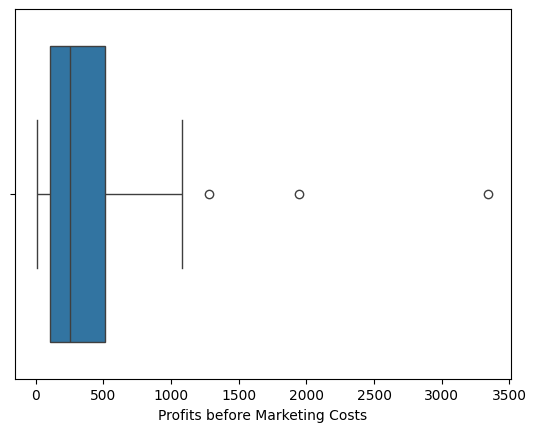

Clicks: 


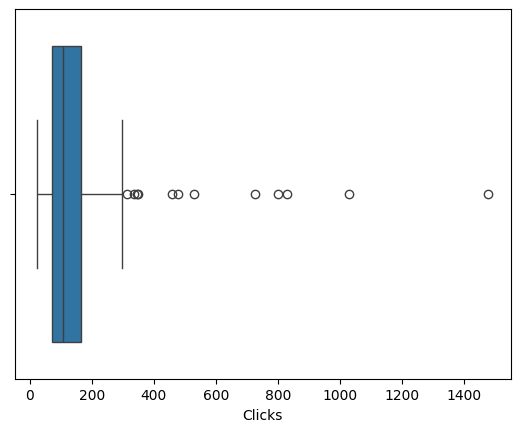

CTR: 


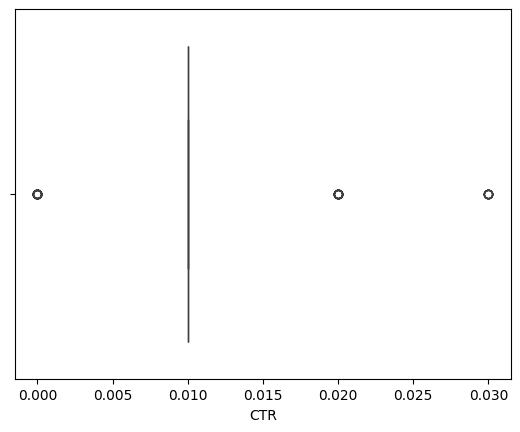

In [9]:
list1 = ['Profits before Marketing Costs', 'Clicks', 'CTR']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=profits_df[str(i)])
    plt.show()

#Remove Outliers

In [10]:
# Convert 'Clicks' column to numeric before calculating Z-scores
profits_df['Clicks'] = pd.to_numeric(profits_df['Clicks'], errors='coerce')

# Calculate Z-scores
profits_df['Z_Score'] = zscore(profits_df['Clicks'])

# Filter out outliers (absolute z-score > 3)
df_no_outliers = profits_df[abs(profits_df['Z_Score']) <= 3]

print(df_no_outliers)

    Campaign Type       Source         Campaign  Input Budget  \
0       Affiliate    Clickbank             Tote           112   
1       Affiliate    Clickbank          Satchel           108   
2       Affiliate    Clickbank            Purse           126   
3       Affiliate   Shareasale            Purse           151   
4         Display  Retargeting  Yellow Backpack           295   
..            ...          ...              ...           ...   
111       Display      YouTube            Purse           299   
112       Display  Retargeting    Blue Backpack           290   
113       Display  Retargeting             Tote           297   
114       Display       Google       Duffel Bag           300   
115       Display  Retargeting      Rolling Bag           290   

     Cost per Impression  Impressions   CTR  Clicks   CPC  Marketing Cost  \
0                   0.04         2811  0.01      24  4.40             104   
1                   0.04         2513  0.01      28  3.55        

In [11]:
# Verify if any outliers remain
outliers_remaining = df_no_outliers[(df_no_outliers['Clicks'] > df_no_outliers['Clicks'].quantile(0.95)) | (df_no_outliers['Clicks'] < df_no_outliers['Clicks'].quantile(0.05))]
if outliers_remaining.empty:
    print("No outliers remaining.")
else:
    print("Outliers detected:\n", outliers_remaining)

Outliers detected:
     Campaign Type       Source         Campaign  Input Budget  \
0       Affiliate    Clickbank             Tote           112   
1       Affiliate    Clickbank          Satchel           108   
2       Affiliate    Clickbank            Purse           126   
3       Affiliate   Shareasale            Purse           151   
4         Display  Retargeting  Yellow Backpack           295   
5       Affiliate   Shareasale  Yellow Backpack           112   
110       Display  Retargeting       Travel Bag           293   
111       Display      YouTube            Purse           299   
112       Display  Retargeting    Blue Backpack           290   
113       Display  Retargeting             Tote           297   
114       Display       Google       Duffel Bag           300   
115       Display  Retargeting      Rolling Bag           290   

     Cost per Impression  Impressions   CTR  Clicks   CPC  Marketing Cost  \
0                   0.04         2811  0.01      24  4.40

#Data Analysis

In [12]:
# Calculate the total profit before marketing costs
total_profit_before_marketing = profits_df['Profits before Marketing Costs'].sum()

# Calculate the average profit margin
average_profit_margin = profits_df['Margin'].mean()

total_profit_before_marketing, average_profit_margin


(45218.240000000005, 0.616)

The total profit before marketing costs is **$45,218.24**, and the average profit margin across all campaigns is **61.6%**.

In [13]:
# Find the campaign with the highest profit before marketing costs
highest_profit_campaign = profits_df.loc[profits_df['Profits before Marketing Costs'].idxmax()]

# Extract relevant details
highest_profit_details = {
    "Campaign": highest_profit_campaign['Campaign'],
    "Profit Before Marketing Costs": highest_profit_campaign['Profits before Marketing Costs'],
    "Margin": highest_profit_campaign['Margin']
}

highest_profit_details

{'Campaign': 'Satchel',
 'Profit Before Marketing Costs': 3344.1,
 'Margin': 0.71}

The campaign with the highest profit before marketing costs is "**Satchel**", with a profit of **$3,344.10** and a profit margin of **71**%.

In [14]:
# Find the campaign with the lowest profit before marketing costs
lowest_profit_campaign = profits_df.loc[profits_df['Profits before Marketing Costs'].idxmin()]

# Extract relevant details
lowest_profit_details = {
    "Campaign": lowest_profit_campaign['Campaign'],
    "Profit Before Marketing Costs": lowest_profit_campaign['Profits before Marketing Costs'],
    "Margin": lowest_profit_campaign['Margin']
}

lowest_profit_details


{'Campaign': 'Handbag', 'Profit Before Marketing Costs': 13.2, 'Margin': 0.4}

The campaign with the lowest profit before marketing costs is "**Handbag**", with a profit of **$13.20** and a profit margin of **40**%.

In [15]:
# Find the campaign with the highest margin
highest_margin_campaign = profits_df.loc[profits_df['Margin'].idxmax()]

# Extract relevant details
highest_margin_details = {
    "Campaign": highest_margin_campaign['Campaign'],
    "Margin": highest_margin_campaign['Margin'],
    "Profit Before Marketing Costs": highest_margin_campaign['Profits before Marketing Costs']
}

highest_margin_details

{'Campaign': 'Travel Bag',
 'Margin': 0.9,
 'Profit Before Marketing Costs': 510.3}

The campaign with the highest margin is "**Travel Bag**", with a margin of **90%** and a profit before marketing costs of **$510.30**.

In [16]:
# Calculate overall ROI (Return on Investment)
# ROI = (Total Revenue - Total Marketing Cost) / Total Marketing Cost

total_revenue = profits_df['Revenue'].sum()
total_marketing_cost = profits_df['Marketing Cost'].sum()

overall_roi = (total_revenue - total_marketing_cost) / total_marketing_cost
overall_roi_percentage = overall_roi * 100  # Convert to percentage

overall_roi_percentage

187.27337502968885

The overall ROI (Return on Investment) is **187.27%**, indicating a strong return relative to the marketing costs.

In [17]:
# Calculate ROI for each campaign and add it as a new column
profits_df['ROI'] = ((profits_df['Revenue'] - profits_df['Marketing Cost']) / profits_df['Marketing Cost']) * 100

# Find the campaign with the highest ROI
highest_roi_campaign = profits_df.loc[profits_df['ROI'].idxmax()]

# Extract relevant details
highest_roi_details = {
    "Campaign": highest_roi_campaign['Campaign'],
    "ROI (%)": highest_roi_campaign['ROI']
}

highest_roi_details

{'Campaign': 'Satchel', 'ROI (%)': 1588.1720430107525}

The campaign with the highest ROI is "**Satchel**", with a return of **1588.17%**.

In [18]:
# Find the campaign with the lowest ROI
lowest_roi_campaign = profits_df.loc[profits_df['ROI'].idxmin()]

# Extract relevant details
lowest_roi_details = {
    "Campaign": lowest_roi_campaign['Campaign'],
    "ROI (%)": lowest_roi_campaign['ROI']
}

lowest_roi_details

{'Campaign': 'Rolling Bag', 'ROI (%)': -86.56716417910447}

The campaign with the lowest ROI is "**Rolling Bag**", with a return of **-86.57%**, indicating a significant loss relative to the marketing cost.

#Visualization

##Top 10 Campaigns based on Profits before Marketing Costs

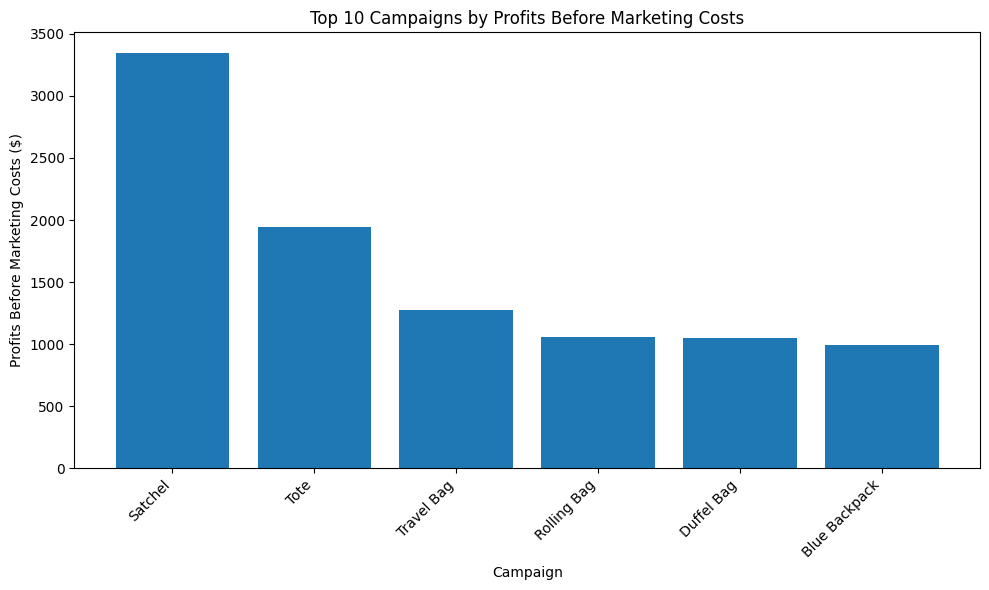

In [19]:
# Select the top 10 campaigns based on profits before marketing costs
top_10_campaigns = profits_df.nlargest(10, 'Profits before Marketing Costs')

# Plot the top 10 campaigns
plt.figure(figsize=(10, 6))
plt.bar(top_10_campaigns['Campaign'], top_10_campaigns['Profits before Marketing Costs'])
plt.xlabel('Campaign')
plt.ylabel('Profits Before Marketing Costs ($)')
plt.title('Top 10 Campaigns by Profits Before Marketing Costs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
# Select relevant columns for the top 10 campaigns
top_10_campaigns_table = top_10_campaigns[['Campaign', 'Profits before Marketing Costs', 'Margin', 'Revenue']]
top_10_campaigns_table

,Campaign,Profits before Marketing Costs,Margin,Revenue
119,Satchel,3344.10,0.71,4710
107,Tote,1945.32,0.86,2262
67,Travel Bag,1277.37,0.83,1539
79,Travel Bag,1079.20,0.71,1520
95,Satchel,1071.00,0.85,1260
97,Rolling Bag,1056.00,0.64,1650
108,Duffel Bag,1048.32,0.48,2184
68,Rolling Bag,1006.20,0.86,1170
57,Blue Backpack,993.65,0.85,1169
105,Duffel Bag,991.20,0.84,1180


##Top 10 Campaigns by ROI (Return on Investment)

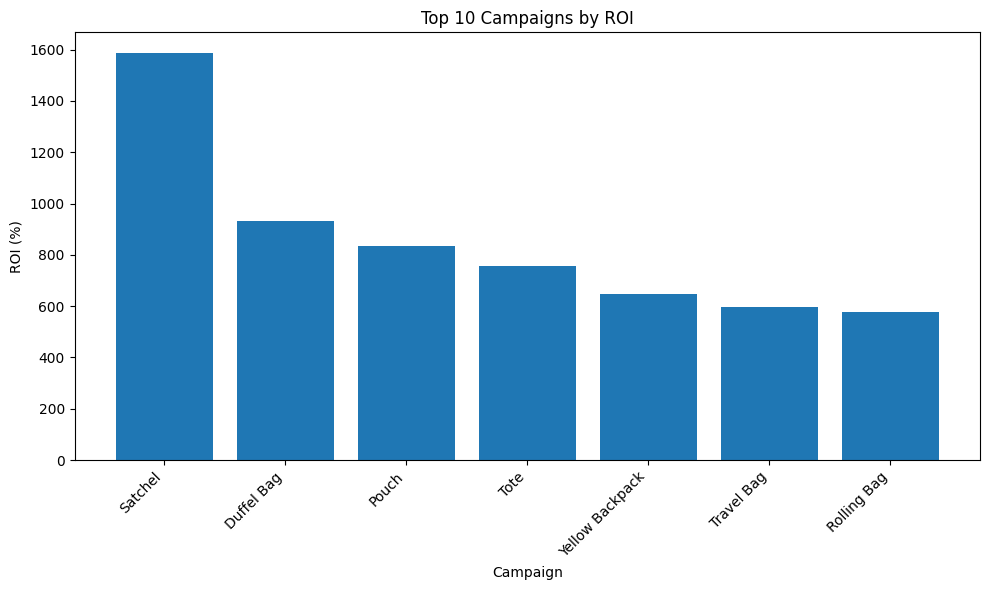

In [21]:
# Select the top 10 campaigns based on ROI
top_10_roi_campaigns = profits_df.nlargest(10, 'ROI')

# Plot the top 10 campaigns by ROI
plt.figure(figsize=(10, 6))
plt.bar(top_10_roi_campaigns['Campaign'], top_10_roi_campaigns['ROI'])
plt.xlabel('Campaign')
plt.ylabel('ROI (%)')
plt.title('Top 10 Campaigns by ROI')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
# Select relevant columns for the top 10 campaigns by ROI
top_10_roi_table = top_10_roi_campaigns[['Campaign', 'ROI', 'Revenue', 'Marketing Cost', 'Profits before Marketing Costs']]
top_10_roi_table

,Campaign,ROI,Revenue,Marketing Cost,Profits before Marketing Costs
119,Satchel,1588.172043,4710,279,3344.10
108,Duffel Bag,930.188679,2184,212,1048.32
88,Pouch,833.333333,1400,150,574.00
84,Tote,758.407080,1940,226,582.00
107,Tote,685.416667,2262,288,1945.32
85,Tote,679.640719,1302,167,611.94
24,Yellow Backpack,645.631068,768,103,537.60
87,Yellow Backpack,631.707317,1200,164,624.00
67,Travel Bag,596.380090,1539,221,1277.37
97,Rolling Bag,576.229508,1650,244,1056.00


#Forecasting

Let's forecast the "**Paid Social / X (Twitter) / Duffle Bag**" campaign.

We'll calculate what we could expect to see in profits before marketing costs from a \$100 investment (exclude the $100 investment).

In [23]:
# Filter the data for the specific campaign
duffle_bag_campaign = profits_df[
    (profits_df['Campaign'] == 'Duffel Bag') &
    (profits_df['Source'] == 'X (Twitter)') &
    (profits_df['Campaign Type'] == 'Paid Social')
]

# Check if the campaign exists in the data
if not duffle_bag_campaign.empty:
    # Calculate the profits before marketing costs for a $100 investment
    cost_per_impression = duffle_bag_campaign['Cost per Impression'].values[0]
    impressions = duffle_bag_campaign['Impressions'].values[0]
    current_cost = duffle_bag_campaign['Marketing Cost'].values[0]
    current_profit = duffle_bag_campaign['Profits before Marketing Costs'].values[0]

    # Calculate the scaling factor
    scaling_factor = 100 / current_cost

    # Forecasted profit before marketing costs
    forecasted_profit = current_profit * scaling_factor
else:
    forecasted_profit = None

forecasted_profit

391.77865612648225

From a \$100 investment in the "**Paid Social / X (Twitter) / Duffel Bag**" campaign, we could expect to see approximately **\$391.78** in profits before marketing costs (excluding the \$100 investment).

#Budget Allocation Strategy

Now, let's put what we've gathered into action!

Our goal for this round is maximizing the amount of clicks using CPC. We will only spend up to $3,000 on any one campaign, but will ensure to take into account the recommended budget max for each campaign.

Using what we've learned from the historical campaign data and our analysis, we're going to allocate funds to various campaigns.

We will use $14,000 to spend on budget allocation AND \$5,000 on performance upgrades (happening in the next tab).

In [24]:
# Add a column to calculate clicks per dollar
profits_df['Clicks per Dollar'] = 1 / profits_df['CPC']

# Rank campaigns by clicks per dollar, prioritize lower CPC
data_sorted = profits_df.sort_values(by='Clicks per Dollar', ascending=False)

# Initialize budget allocation plan
budget_allocation = []
remaining_budget = 14000

# Allocate funds based on clicks per dollar and recommended budget max
for _, row in data_sorted.iterrows():
    if remaining_budget <= 0:
        break

    # Determine the maximum possible allocation for this campaign
    max_allocation = min(3000, row['Recommended Budget Max'], remaining_budget)

    if max_allocation > 0:
        budget_allocation.append({
            "Channel": row['Source'],
            "Campaign Name": row['Campaign'],
            "Allocated Budget": max_allocation,
            "Projected Clicks": max_allocation * row['Clicks per Dollar']
        })
        remaining_budget -= max_allocation

# Convert budget allocation to a DataFrame
budget_allocation_df = pd.DataFrame(budget_allocation)
budget_allocation_df.head()

,Channel,Campaign Name,Allocated Budget,Projected Clicks
0,Retargeting,Satchel,1344.0,7073.684211
1,Retargeting,Purse,1623.0,6011.111111
2,YouTube,Tote,950.0,2878.787879
3,Google,Yellow Backpack,1878.0,5523.529412
4,Retargeting,Rolling Bag,729.0,1918.421053


#Performance Upgrades

We'll now select the upgrades that provide the highest ROI improvements,  relative to their cost, to help maximize profits using ROI.
Here's how we can approach this:

* Prioritize upgrades with the highest percentage increase in ROI across all campaigns.

* Balance the ROI increase with the cost of the upgrade.

* If a channel has significant allocated funds, consider upgrades that boost ROI for those campaigns.

**Calculate Customer Lifetime Value**:

* Increases ROI for all campaigns by 25%.
* High overall impact for $2,000.

**Conversion Rate Optimization Training**:
* Increases ROI for all campaigns by 10%.
* Provides a substantial boost for only $1,000.

**Fixed Missing UTM Tracking**:
* Increases ROI for all campaigns by 3%.
* A moderate boost for $2,000.

These upgrades provide a total ROI increase of **38%** across all campaigns. This significant improvement aligns with the goal of optimizing profits and ensures funds are allocated effectively to campaigns with enhanced performance potential.

#Results of the campaign

In [25]:
results_df = pd.read_csv('Results-of-Campaign.csv')
results_df.head()

,Campaign Type,Source,Campaign,Cost Per Impression,Impressions,CTR,Clicks,CPC,Cost,Allocated Budget,Conversions,CPA (Cost Per Conversion),Conversion Rate,Average Revenue Per Conversion,Revenue,Margin,Profits,ROI
Display,Retargeting,Satchel,$0.0010,1339216,0.53%,7098,$0.19,"$1,339.22","$1,344.00",142,$9.43,2.00%,$208.36,"$29,577.48",71.00%,"$21,000.01",1,468.08%
Display,Retargeting,Purse,$0.0010,1621964,0.37%,6001,$0.27,"$1,621.96","$1,623.00",65,$25.03,1.08%,$144.65,"$9,375.58",75.00%,"$7,031.68",333.53%,NaN
Display,YouTube,Tote,$0.0010,904054,0.30%,2712,$0.33,$904.05,$950.00,31,$28.74,1.16%,$176.50,"$5,553.03",39.00%,"$2,165.68",139.55%,NaN
Paid Search,Google,Yellow Backpack,$0.0220,85180,2.17%,1848,$1.01,"$1,873.97","$1,878.00",95,$19.69,5.15%,$199.07,"$18,949.72",52.00%,"$9,853.85",425.83%,NaN
Display,Retargeting,Rolling Bag,$0.0030,231596,0.80%,1853,$0.38,$694.79,$729.00,23,$30.24,1.24%,$180.49,"$4,146.56",40.00%,"$1,658.62",138.72%,NaN


#Summary of Results

The data suggests that focusing on Retargeting and optimizing Paid Search strategies could further enhance campaign profitability and performance.

* Retargeting campaigns demonstrated strong performance, generating the highest number of conversions and maintaining a significant return on investment (ROI) of 468.08%, showcasing their ability to re-engage potential customers effectively.

* While Paid Search campaigns also delivered notable results with higher click-through rates and robust profits, their overall ROI was slightly below Retargeting efforts.

* Social media campaigns, including Instagram and Twitter, displayed moderate effectiveness with reasonable conversion rates, but their ROI and profitability were comparatively lower.

* YouTube campaigns, despite lower costs, yielded the smallest profit margins, indicating potential inefficiencies in reaching and converting their target audience.

#Recommendation

Based on the campaign performance analysis, here are two key recommendations:

**Prioritize Retargeting Campaigns**:
* Retargeting campaigns with the highest ROI and conversions, indicating their strong potential to drive engagement and profitability.

* Increasing the allocated budget for these campaigns and exploring more personalized retargeting strategies, such as dynamic ad content or customer segmentation, could amplify their effectiveness further.

**Optimize YouTube and Social Media Campaigns**:
* The comparatively lower ROI and profits from YouTube and social media campaigns suggest room for improvement.

* Conduct A/B testing on ad creatives, targeting parameters, and video durations to enhance engagement. Additionally, refine audience segmentation to ensure ads are shown to more relevant viewers, maximizing the return on ad spend for these platforms.